In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
%matplotlib inline

From the data exploratory exercise, we identified that loan purpose appears to have influence on the loans being paid off or not. To prove that the influence is statistically significant, we will run chi square test on it

In [2]:
lend = pd.read_csv('data/lending_clean.csv')
lend_2009on = lend[lend['loan_start_d'] >= '2009-01-01']

Null Hypothesis - different loan purposes do not affect loan paid off rate

Alternative Hypothesis - loan purposes affect paid off rate

In [3]:
table = pd.crosstab(lend_2009on['purpose'], lend_2009on['target'], margins=True)
table['paid_off_rate'] = table[1]/(table[1] + table[0])*100
print(table.sort_values(by='paid_off_rate', ascending=False))

target                 0      1    All  paid_off_rate
purpose                                              
car                  157   1391   1548      89.857881
major_purchase       228   1982   2210      89.683258
wedding               98    840    938      89.552239
credit_card          539   4452   4991      89.200561
home_improvement     379   2644   3023      87.462785
All                 5777  33762  39539      85.389109
vacation              58    324    382      84.816754
debt_consolidation  2829  15764  18593      84.784596
house                 64    328    392      83.673469
other                653   3320   3973      83.564057
moving                97    486    583      83.361921
medical              116    577    693      83.261183
educational           56    245    301      81.395349
renewable_energy      20     83    103      80.582524
small_business       483   1326   1809      73.300166


In [4]:
stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
print ('expected freq: \n {}'.format(pd.DataFrame(expected, index=table.index)))

chi_statistic: 378.179
p-value: 0.00
degree of freedom: 14
expected freq: 
                               0             1
purpose                                      
car                  226.176585   1321.823415
credit_card          729.229546   4261.770454
debt_consolidation  2716.602873  15876.397127
educational           43.978780    257.021220
home_improvement     441.687220   2581.312780
house                 57.274691    334.725309
major_purchase       322.900680   1887.099320
medical              101.253471    591.746529
moving                85.181492    497.818508
other                580.490680   3392.509320
renewable_energy      15.049217     87.950783
small_business       264.311009   1544.688991
vacation              55.813602    326.186398
wedding              137.050153    800.949847
All                 5777.000000  33762.000000


In [5]:
# interpret p-value, using 95% confident level
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

Dependent (reject H0)


Conclude that loan_purpose has impact on the loan paid off rates

Additionally, the following attributes will be test as well per exploratory analysis

- Credit history
- DTI
- Number of credit lines 
- state of the applicants

In [6]:
# write a function to streamline the testing steps
def chi_square(data):
    table = pd.crosstab(lend_2009on[data], lend_2009on['target'])
    table['paid_off_rate'] = table[1]/(table[1] + table[0])*100
    stat, p, dof, expected = stats.chi2_contingency(table[[0,1]])
    print ('chi_statistic: {:.3f}'.format(stat))
    print ('p-value: {:.2f}'.format(p))
    print ('degree of freedom: {:.0f}'.format(dof))
    prob = 0.95
    alpha = 1.0 - prob
    if p <= alpha:
        print('Dependent (reject H0)')
    else:
        print('Independent (fail to reject H0)')

In [7]:
# Credit history
chi_square('yr_credit')

chi_statistic: 112.650
p-value: 0.00
degree of freedom: 52
Dependent (reject H0)


In [8]:
yr_credit_chi = pd.crosstab(lend_2009on['yr_credit'], lend_2009on['target'])

In [9]:
bins = [0, 5, 10, 15, 20, 30, 40 , 100]
yr_credit_table = lend_2009on.copy()
yr_credit_table['binned'] = pd.cut(yr_credit_table['yr_credit'], bins=bins)

In [10]:
table_cre = pd.crosstab(yr_credit_table['binned'], yr_credit_table['target']).sort_index()
table_cre['not_paid_off'] = table_cre[0]/(table_cre[0]+table_cre[1])*100

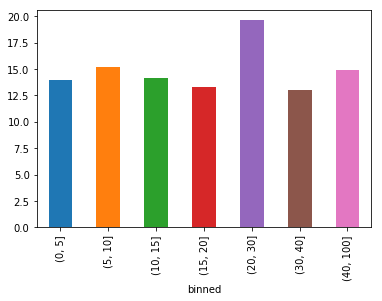

In [11]:
table_cre['not_paid_off'].plot(kind='bar');
# check if the data make sense for the 50+ years

In [12]:
stat, p, dof, expected = stats.chi2_contingency(table_cre[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
print ('expected freq: \n {}'.format(pd.DataFrame(expected, index=table_cre.index)))
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi_statistic: 58.967
p-value: 0.00
degree of freedom: 6
expected freq: 
                      0             1
binned                              
(0, 5]     1113.934293   6510.065707
(5, 10]    2004.760287  11716.239713
(10, 15]   1393.002302   8140.997698
(15, 20]    777.299375   4542.700625
(20, 30]    312.380839   1825.619161
(30, 40]    150.053846    876.946154
(40, 100]    25.569058    149.430942
Dependent (reject H0)


In [13]:
# DTI
chi_square('dti')

chi_statistic: 2886.172
p-value: 0.39
degree of freedom: 2866
Independent (fail to reject H0)


target       0     1  not_paid_off
binned                            
(0, 5]    1005  6942     12.646282
(5, 10]   1444  8371     14.712175
(10, 15]  1261  6361     16.544214
(15, 20]  1437  7730     15.675794
(20, 30]   601  4222     12.461124


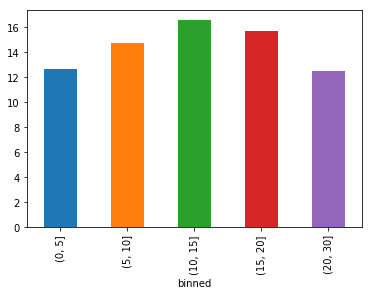

In [14]:
bins = [0, 5, 10, 15, 20, 30, 40]
dti_table = lend_2009on.copy()
dti_table['binned'] = pd.cut(dti_table['dti'], bins=bins)
table_dti = pd.crosstab(dti_table['binned'], dti_table['target']).sort_index()
table_dti['not_paid_off'] = table_dti[0]/(table_dti[0]+table_dti[1])*100
print(table_dti)
table_dti['not_paid_off'].plot(kind='bar');

In [15]:
stat, p, dof, expected = stats.chi2_contingency(table_dti[[0,1]])
print ('chi_statistic: {:.3f}'.format(stat))
print ('p-value: {:.2f}'.format(p))
print ('degree of freedom: {:.0f}'.format(dof))
print ('expected freq: \n {}'.format(pd.DataFrame(expected, index=table_dti.index)))
prob = 0.95
alpha = 1.0 - prob
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (fail to reject H0)')

chi_statistic: 73.746
p-value: 0.00
degree of freedom: 4
expected freq: 
                     0            1
binned                            
(0, 5]    1160.140092  6786.859908
(5, 10]   1432.839437  8382.160563
(10, 15]  1112.695078  6509.304922
(15, 20]  1338.241378  7828.758622
(20, 30]   704.084015  4118.915985
Dependent (reject H0)


In [16]:
# number of credit line
chi_square('total_acc')

chi_statistic: 150.631
p-value: 0.00
degree of freedom: 80
Dependent (reject H0)


target        0     1  not_paid_off
binned                             
(0, 5]      787  3895     16.809056
(5, 10]     215   927     18.826620
(10, 15]   1002  6026     14.257257
(15, 20]    377  2296     14.104003
(20, 30]   1528  9741     13.559322
(30, 40]   1034  5750     15.241745
(40, 60]    804  4932     14.016736
(60, 100]    30   195     13.333333


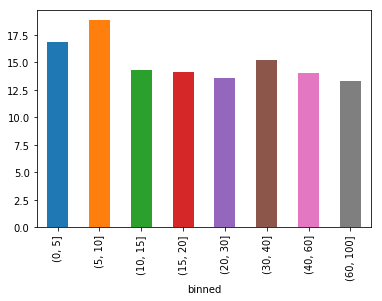

In [17]:
bins = [0, 5, 10, 15, 20, 30, 40, 60, 100]
ttl_acc_table = lend_2009on.copy()
ttl_acc_table['binned'] = pd.cut(ttl_acc_table['total_acc'], bins=bins)
table_ttl_acc = pd.crosstab(ttl_acc_table['binned'], ttl_acc_table['target']).sort_index()
table_ttl_acc['not_paid_off'] = table_ttl_acc[0]/(table_ttl_acc[0]+table_ttl_acc[1])*100
print(table_ttl_acc)
table_ttl_acc['not_paid_off'].plot(kind='bar');

In [18]:
# state of the applicants
chi_square('addr_state')
table_state = pd.crosstab(lend_2009on['addr_state'], lend_2009on['target'], margins=True)
table_state['paid_off_rate'] = table_state[1]/(table_state[1] + table_state[0])*100
print(table_state.sort_values(by='paid_off_rate', ascending=False))

chi_statistic: 128.067
p-value: 0.00
degree of freedom: 45
Dependent (reject H0)
target         0      1    All  paid_off_rate
addr_state                                   
TN             0      1      1     100.000000
IA             0      1      1     100.000000
WY             4     81     85      95.294118
DC            13    199    212      93.867925
DE            13    114    127      89.763780
CO            94    678    772      87.823834
AL            56    399    455      87.692308
KS            33    234    267      87.640449
AR            31    219    250      87.600000
WV            23    162    185      87.567568
TX           345   2395   2740      87.408759
CT            96    666    762      87.401575
MA           169   1152   1321      87.206662
LA            56    378    434      87.096774
VA           179   1197   1376      86.991279
RI            25    167    192      86.979167
NY           503   3283   3786      86.714210
OH           167   1085   1252      86.661342

Notice that TN and IA have 100% paid off rate, but they only have 1 records each, hence we don't have big enough sample to conclude that all applicants from both states will always repay their loans

#### Conclusion
Credit history, number of credit lines, and state of applicants have impact on the loan paid off rates. DTI initially does not show impact to the loan paid off rate when test at individual level, but when group them by bins, it indicates correlation to the paid off rate.